<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Simple Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Let's first have a descriptive exploration on our data.


In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.describe(include="all")

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [5]:
df.isna().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

We Have checked that whether there are any empty values in our data set

In [6]:
df.replace("?", np.nan, inplace = True)
a = df['CO2EMISSIONS'].value_counts() #counting values
b = df['FUELTYPE'].value_counts()
#print(a)
#print(b)
missing_data = df.isnull()
missing_data["CO2EMISSIONS"].value_counts()

False    1067
Name: CO2EMISSIONS, dtype: int64

False 1067 shows that there are 1067 filled values and no empty value in that column

Let's select some features to explore more.


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


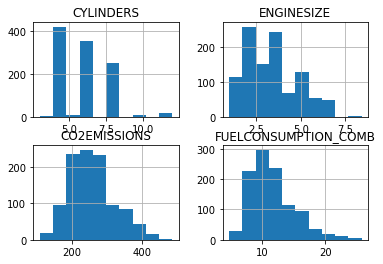

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


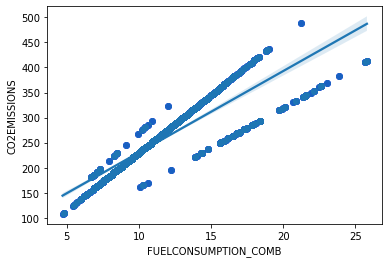

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
sns.regplot(x = "FUELCONSUMPTION_COMB", y = "CO2EMISSIONS", data = cdf)
plt.show()

In [ ]:
sns.regplot(data = cdf, x ="FUELCONSUMPTION_COMB" , y = "CO2EMISSIONS", marker = 'x')

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
sns.regplot(x = "ENGINESIZE", y = "CO2EMISSIONS", data = cdf)
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relationship is:


In [ ]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
sns.regplot(x = "CYLINDERS", y = "CO2EMISSIONS", data = cdf)
plt.show()



<details><summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [10]:
#There is also another way of doing this using train_test_split technique using library
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(train)
print(test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
5            3.5          6                  10.0           230
...          ...        ...                   ...           ...
1060         3.0          6                  11.5           264
1061         3.2          6                  11.2           258
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260

[844 rows x 4 columns]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
4            3.5          6                  10.6           244
13           5.9         12                  15.6           359
25           2.0

In [11]:
x = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
y = cdf['CO2EMISSIONS']
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x,y,test_size = 0.2, random_state = 42)

In [12]:
xtrain

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
333,1.4,4,7.8,179
106,4.4,8,12.7,292
585,3.0,6,9.9,267
55,3.0,6,11.4,262
213,5.3,8,16.5,380
...,...,...,...,...
330,3.6,6,12.0,276
466,2.4,4,10.0,230
121,4.4,8,13.8,317
1044,1.8,4,8.6,198


In [13]:
xtest

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
732,4.7,8,13.2,304
657,3.5,6,9.6,221
168,3.6,6,12.8,294
86,3.0,6,9.6,221
411,2.0,4,9.0,207
...,...,...,...,...
963,2.0,4,9.2,212
294,2.4,4,10.0,230
275,2.4,4,10.1,232
903,3.0,6,11.3,260


### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


#### Train data distribution


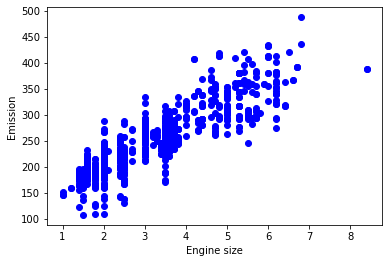

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Using sklearn package to model data.


In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#from sklearn.linear_model import LinearRegression
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.31980526]]
Intercept:  [124.5129116]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

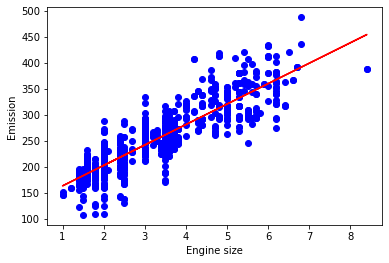

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #y = regr.coef_[0][0]*train_x + regr.intercept_[0]
plt.xlabel("Engine size")
plt.ylabel("Emission")

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

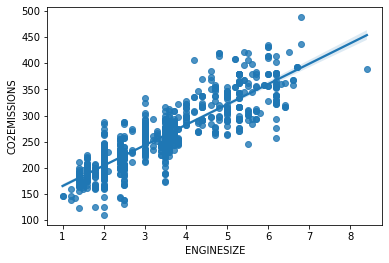

In [17]:
sns.regplot(data = xtrain , x = "ENGINESIZE", y = "CO2EMISSIONS")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )
print("Alternate for MSE")
print(mean_squared_error(test_y, test_y_))
print("Alternate for MAE")
print(mean_absolute_error(test_y, test_y_))

Mean absolute error: 21.84
Residual sum of squares (MSE): 849.15
R2-score: 0.78
Alternate for MSE
849.1486712254288
Alternate for MAE
21.835725923224153


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [19]:

train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]] #From test data set we have choosen this col,

<details><summary>Click here for the solution</summary>

```python
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [20]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print(regr.coef_)
print(regr.intercept_)

[[15.9478984]]
[70.95269512]


In [21]:
from sklearn.linear_model import LinearRegression
feature_cols = ["FUELCONSUMPTION_COMB"]
x = cdf[feature_cols]
y = cdf.CO2EMISSIONS
lm = LinearRegression()
lm.fit(x,y)
print(lm.coef_)
print(lm.intercept_)

#2nd way of doing above task

[16.21997027]
68.38713348317259


<details><summary>Click here for the solution</summary>

```python
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [22]:
predictions = lm.predict(test_x)
predictions

array([240.31881829, 321.41866962, 233.83083019, 250.05080045,
       271.1367618 , 323.04066665, 318.17467557, 357.1026042 ,
       272.75875883, 266.27077072, 235.45282722, 336.01664286,
       177.06093426, 204.63488371, 232.20883316, 228.96483911,
       215.9888629 , 274.38075585, 232.20883316, 274.38075585,
       319.79667259, 203.01288668, 292.22272314, 306.82069638,
       215.9888629 , 264.64877369, 217.61085992, 321.41866962,
       254.91679153, 336.01664286, 201.39088966, 227.34284208,
       250.05080045, 251.67279748, 276.00275288, 308.44269341,
       337.63863989, 306.82069638, 334.39464583, 426.84847634,
       238.69682127, 250.05080045, 211.12287182, 201.39088966,
       183.54892237, 215.9888629 , 230.58683614, 272.75875883,
       326.2846607 , 336.01664286, 336.01664286, 417.11649419,
       363.59059231, 374.9445715 , 240.31881829, 209.50087479,
       228.96483911, 233.83083019, 297.08871422, 357.1026042 ,
       300.33270828, 198.14689561, 196.52489858, 190.03

In [23]:
predictionss = regr.predict(test_x)
predictionss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[240.00041814],
       [319.73991013],
       [233.62125878],
       [249.56915718],
       [270.3014251 ],
       [321.33469997],
       [316.55033045],
       [354.82528661],
       [271.89621494],
       [265.51705558],
       [235.21604862],
       [334.09301869],
       [177.80361439],
       [204.91504166],
       [232.02646894],
       [228.83688926],
       [216.07857054],
       [273.49100478],
       [232.02646894],
       [273.49100478],
       [318.14512029],
       [203.32025182],
       [291.03369302],
       [305.38680157],
       [216.07857054],
       [263.92226574],
       [217.67336038],
       [319.73991013],
       [254.3535267 ],
       [334.09301869],
       [201.72546198],
       [227.24209942],
       [249.56915718],
       [251.16394702],
       [275.08579462],
       [306.98159141],
       [335.68780853],
       [305.38680157],
       [332.49822885],
       [423.40124972],
       [238.4056283 ],
       [249.56915718],
       [211.29420102],
       [201

In [24]:
train_y

array([[196],
       [221],
       [136],
       [255],
       [230],
       [232],
       [255],
       [267],
       [212],
       [225],
       [239],
       [359],
       [338],
       [354],
       [338],
       [354],
       [359],
       [202],
       [230],
       [214],
       [230],
       [230],
       [214],
       [251],
       [224],
       [258],
       [224],
       [258],
       [260],
       [227],
       [230],
       [242],
       [239],
       [258],
       [212],
       [246],
       [304],
       [294],
       [336],
       [407],
       [409],
       [336],
       [407],
       [354],
       [306],
       [308],
       [262],
       [285],
       [262],
       [285],
       [267],
       [281],
       [297],
       [292],
       [209],
       [209],
       [237],
       [297],
       [356],
       [320],
       [380],
       [322],
       [380],
       [437],
       [193],
       [200],
       [202],
       [181],
       [200],
       [209],
       [209],
      

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predictions = train_y #point to ponder
test_y_ = regr.predict(train_x)
print("MAE = ", mean_absolute_error(predictions, test_y_))
print("MSE = ", mean_squared_error(predictions, test_y_))    #train_y = np.asanyarray(train[['CO2EMISSIONS']])
print("R2-score =", r2_score(train_y , test_y_) )

MAE =  20.841551233151538
MSE =  832.905375953868
R2-score = 0.7938366959162955


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predictions = test_y #point to ponder
test_y_ = regr.predict(test_x)
print("MAE = ", mean_absolute_error(predictions, test_y_))
print("MSE = ", mean_squared_error(predictions, test_y_))    #train_y = np.asanyarray(train[['CO2EMISSIONS']])
print("R2-score =", r2_score(test_y , test_y_) )

MAE =  20.236202520200933
MSE =  771.9926827126234
R2-score = 0.8023464216040479


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<details><summary>Click here for the solution</summary>

```python
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [32]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y_)))


Mean Absolute Error: 20.24


<details><summary>Click here for the solution</summary>

```python
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


# Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-03        | 2.1     | Lakshmi Holla | Changed URL of the csv             |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
